In [39]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns

In [40]:
from pylab import rcParams

rcParams['figure.figsize'] = 15,10

In [41]:
plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [42]:
df = pd.read_csv('./20221117.csv', encoding='euc-kr')
df.head(5)

,역사명,일평균승하차,사업체수,인구수(가중치),전체 상가 면적,운수수익
0,가야,5799.0,202,27599052,11.0,1992142
1,감전,6107.0,427,11335845,10.0,2622066
2,강서구청,4251.0,251,2428875,NaN,2098721
3,개금,13621.0,240,29006316,37.0,4878859
4,거제,9546.0,119,4173939,16.0,3205832


In [43]:
df.isnull().sum()

역사명         0
일평균승하차      1
사업체수        0
인구수(가중치)    0
전체 상가 면적    9
운수수익        0
dtype: int64

In [44]:
df = df.fillna(0)
df.isnull().sum()

역사명         0
일평균승하차      0
사업체수        0
인구수(가중치)    0
전체 상가 면적    0
운수수익        0
dtype: int64

### 산점도

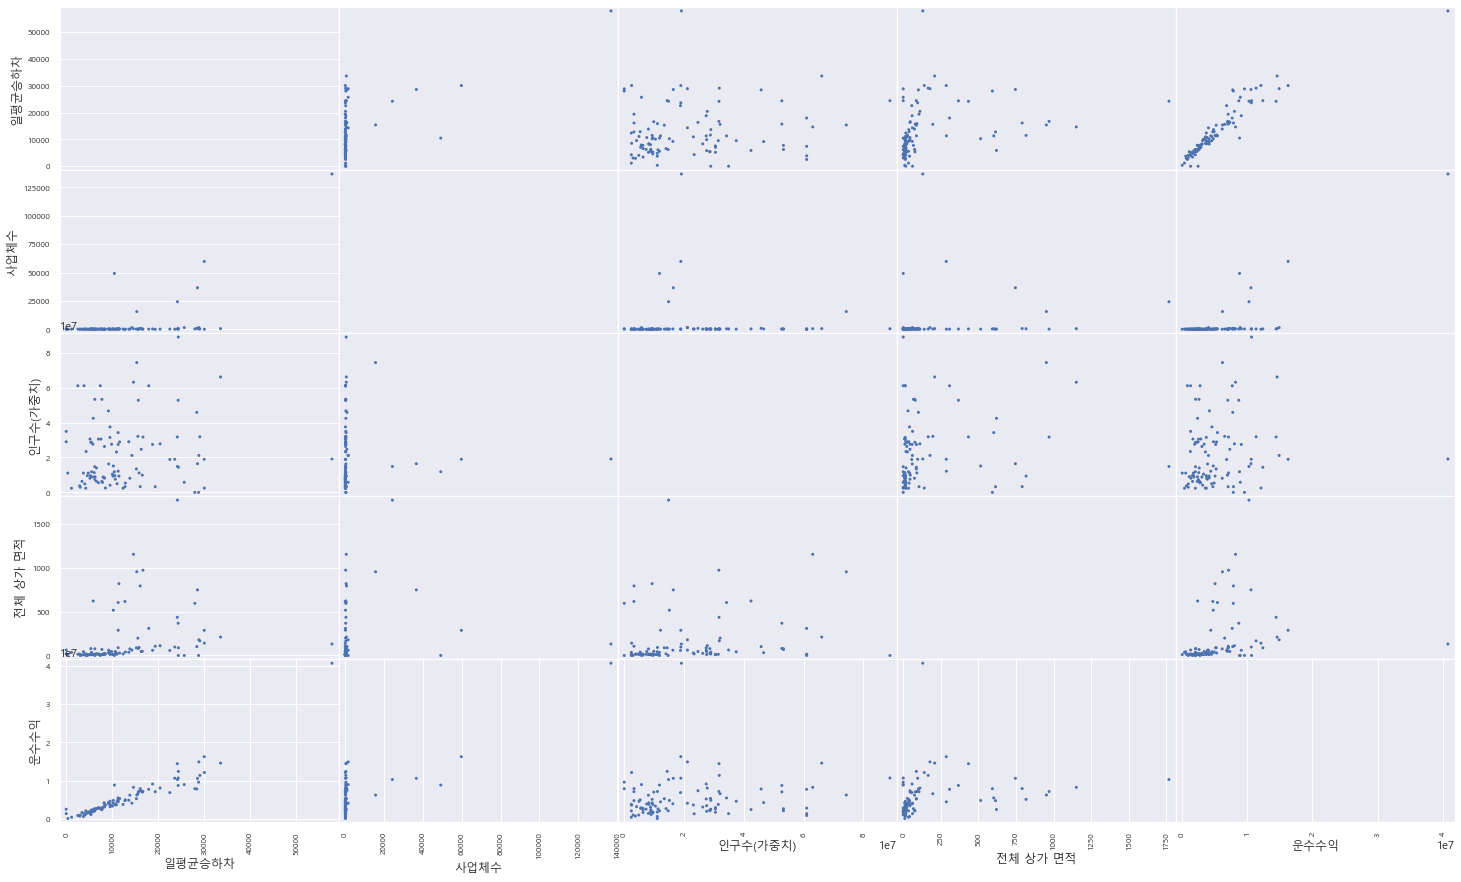

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(25,15), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

#### 일평균 운행수익과 각 변수별 산점도

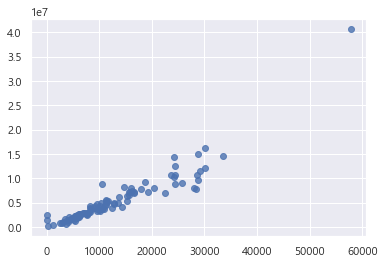

In [8]:
# 일평균 승하차와 일평균 수익 산점도
plt.scatter(df[['일평균승하차']], df[['운수수익']], alpha=0.8)
plt.show()

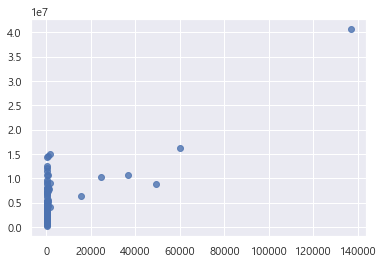

In [9]:
# 사업체수와 일평균 수익 산점도
plt.scatter(df[['사업체수']], df[['운수수익']], alpha=0.8)
plt.show()

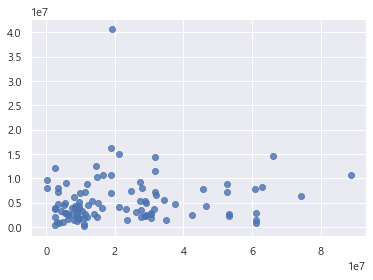

In [10]:
# 인구수(가중치)와 일평균 수익 산점도
plt.scatter(df[['인구수(가중치)']], df[['운수수익']], alpha=0.8)
plt.show()

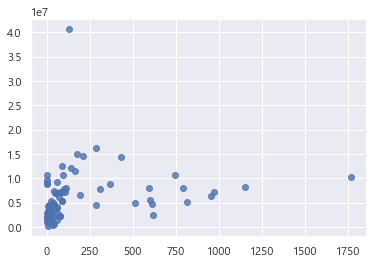

In [11]:
# 전체 상가 면적와 일평균 수익 산점도
plt.scatter(df[['전체 상가 면적']], df[['운수수익']], alpha=0.8)
plt.show()

## 상관계수 확인

0.1 이상은 비교해볼만 가치가 있다.\
(유의미한 결과가 있을 수 있다)

In [12]:
df_dr_corr = df.corr()
df_dr_corr

,일평균승하차,사업체수,인구수(가중치),전체 상가 면적,운수수익
일평균승하차,1.000000,0.546128,0.128095,0.304996,0.924528
사업체수,0.546128,1.000000,-0.013754,0.153208,0.744987
인구수(가중치),0.128095,-0.013754,1.000000,0.176950,0.127551
전체 상가 면적,0.304996,0.153208,0.176950,1.000000,0.263327
운수수익,0.924528,0.744987,0.127551,0.263327,1.000000


### 히트맵 확인

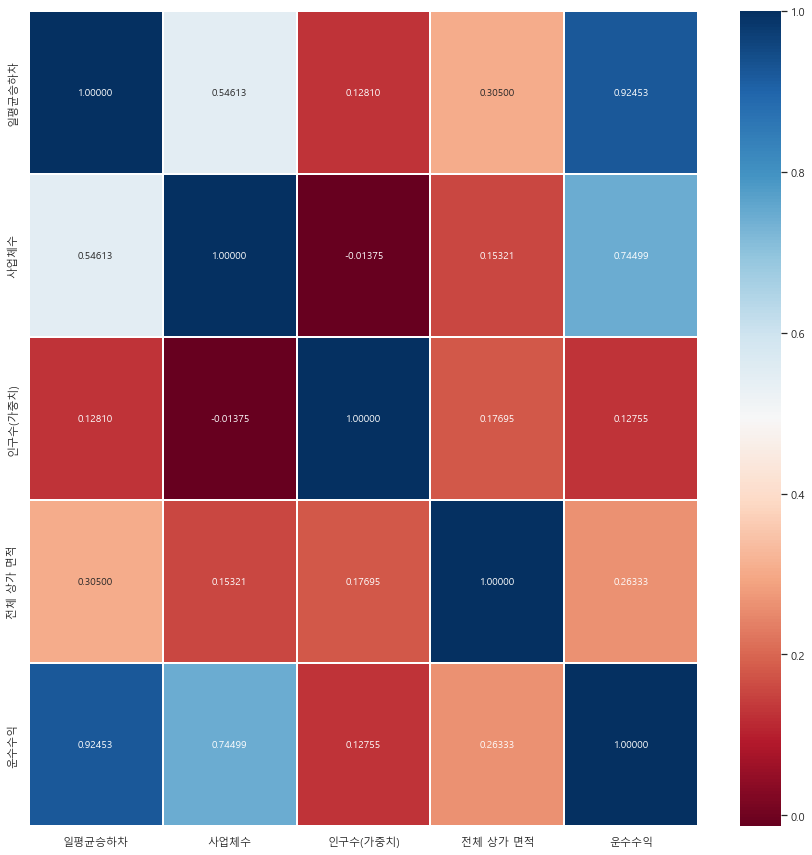

In [13]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(df_dr_corr, annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

## 다중회귀분석

In [14]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [15]:
x = df[["일평균승하차","사업체수","인구수(가중치)","전체 상가 면적"]]

In [16]:
y = df[["운수수익"]]

In [17]:
# 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

In [18]:
# Train the MLR / 회귀모델적합
# OLS(Ordinary Least Squares)
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [19]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                   운수수익   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              568.0
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                    2.47e-50
Time:                        11:58:31   Log-Likelihood:                         -1088.2
No. Observations:                  70   AIC:                                      2184.
Df Residuals:                      66   BIC:                                      2193.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.341
- Adj. R-squared : 0.301
- Prob (F-statistic) : 1.31e-05
- P>[t] : 인구수(가중치)만 유의미함

### 선형 회귀

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
mlr = LinearRegression()
multi_model = mlr.fit(x_train, y_train) 

In [22]:
# 훈련 정확도
multi_model.score(x_train, y_train)

0.9405668557781223

In [23]:
multi_model.score(x_test, y_test)

0.9027383904451043

### 예측

In [24]:
my_predict = mlr.predict(x_test)
my_predict

array([[ 2290066.81153401],
       [ 4777491.87269598],
       [ 1982310.8007418 ],
       [ 1449511.20947464],
       [ 1230453.90329326],
       [ 3961687.65343961],
       [ 3353998.33974033],
       [ 1914725.72425502],
       [ 2184240.52011179],
       [ 2386569.57239278],
       [ 3923047.89475249],
       [ 2365657.57160055],
       [ 5278081.83728012],
       [ 4038613.81592771],
       [ 4334413.11520799],
       [ 3567302.02612745],
       [ 1716752.13872335],
       [ 8042883.42721382],
       [ 2120045.68062244],
       [ 9710376.9779449 ],
       [ 2237571.64285861],
       [ 2322823.00060235],
       [ 3441916.19983294],
       [  169652.21332302],
       [11387348.77627129],
       [ 4384581.65858789],
       [ 4671432.81801689],
       [12086937.75344427],
       [ 2894025.70404239],
       [ 2028450.55212823],
       [ 6101460.62424375]])

### 시각화

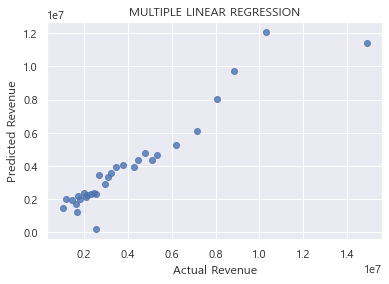

In [25]:
plt.scatter(y_test, my_predict, alpha=0.8)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

### 상관계수 확인

In [26]:
print(mlr.coef_)

[[ 3.86593237e+02  1.15986216e+02  1.10137494e-02 -4.14453298e+01]]


## 표준화(Standard) 후 재분석

### 표준화

In [27]:
# Numpy 를 이용한 표준화 : z = (x - mean())/std()
df_dr_standard = (df - np.mean(df, axis=0)) / np.std(df, axis=0)
df_dr_standard

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,사업체수,역사명,운수수익,인구수(가중치),일평균승하차,전체 상가 면적
0,-0.206226,NaN,-0.663686,0.317671,-0.728370,-0.484726
1,-0.192119,NaN,-0.538227,-0.548820,-0.695026,-0.488178
2,-0.203154,NaN,-0.642459,-1.023376,-0.895958,-0.522696
3,-0.203844,NaN,-0.088753,0.392649,0.118445,-0.394978
4,-0.211430,NaN,-0.421961,-0.930400,-0.322717,-0.467467
...,...,...,...,...,...,...
96,-0.205725,NaN,-0.830327,-0.669494,-0.771783,-0.488178
97,-0.207543,NaN,0.175984,-0.719083,0.142803,-0.263809
98,-0.195442,NaN,1.207573,0.542433,1.792046,0.050308
99,-0.194564,NaN,0.758206,0.309597,0.678477,-0.319038


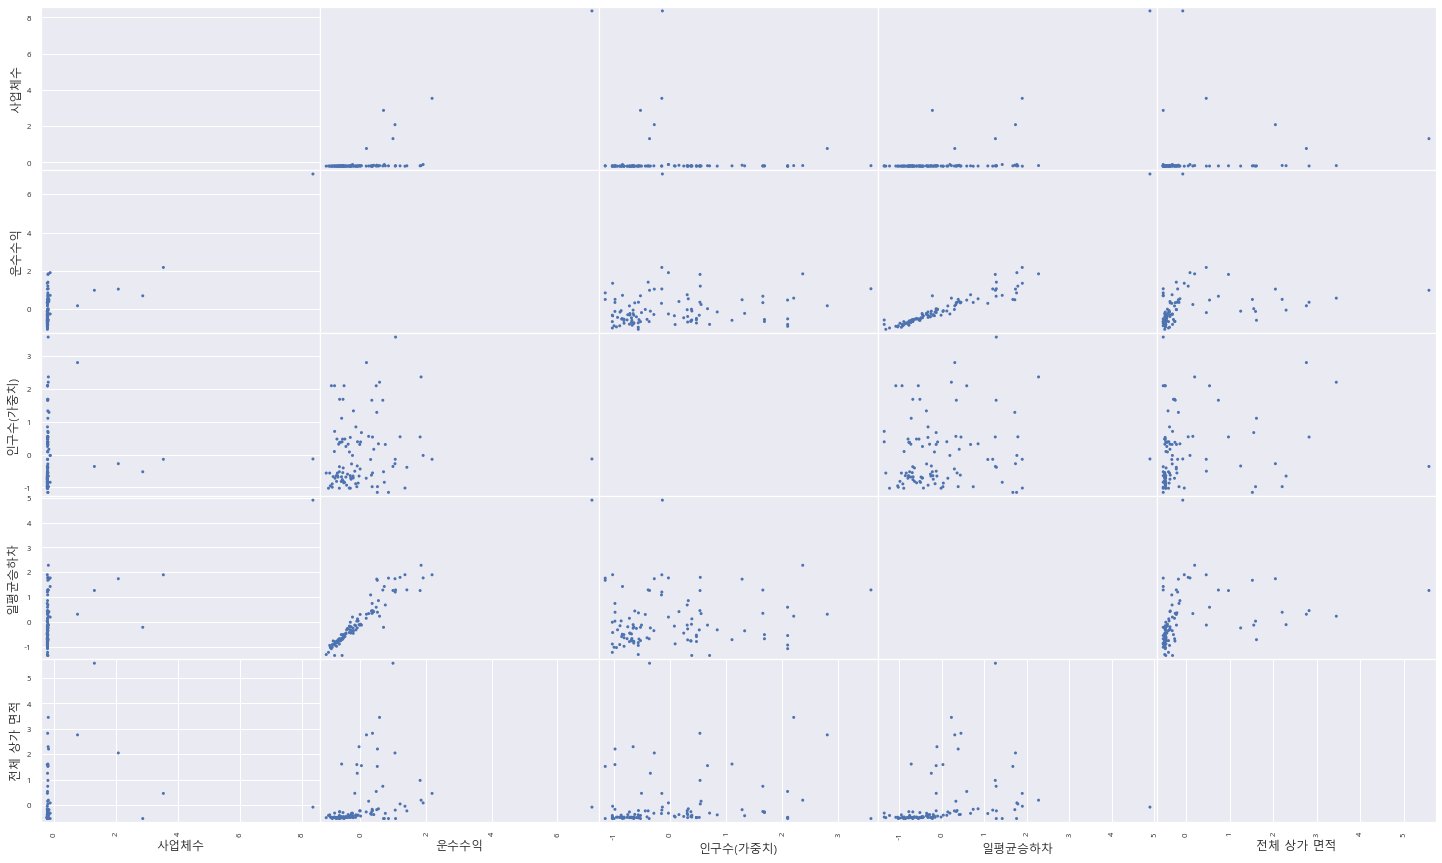

In [28]:
# 변수별 산점도
from pandas.plotting import scatter_matrix
scatter_matrix(df_dr_standard,
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(25,15), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

#### 일평균 운행수익과 각 변수별 산점도

In [29]:
# 일평균 승하차와 일평균 수익 산점도
plt.scatter(df_dr_standard[['일평균승하차']], df_dr_standard[['일평균운행수익(원)']], alpha=0.8)
plt.show()

KeyError: "None of [Index(['일평균운행수익(원)'], dtype='object')] are in the [columns]"

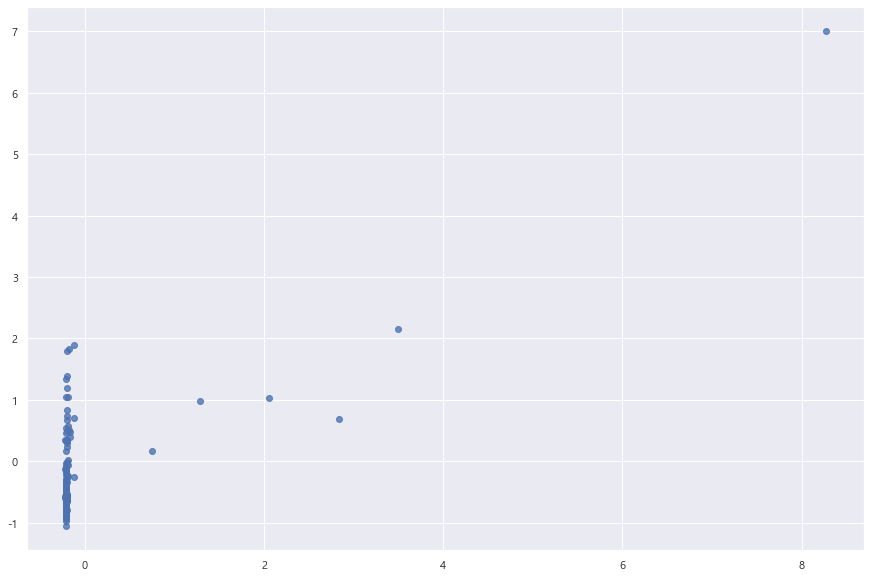

In [ ]:
# 업장수와 일평균 수익 산점도
plt.scatter(df_dr_standard[['업장수']], df_dr_standard[['일평균운행수익(원)']], alpha=0.8)
plt.show()

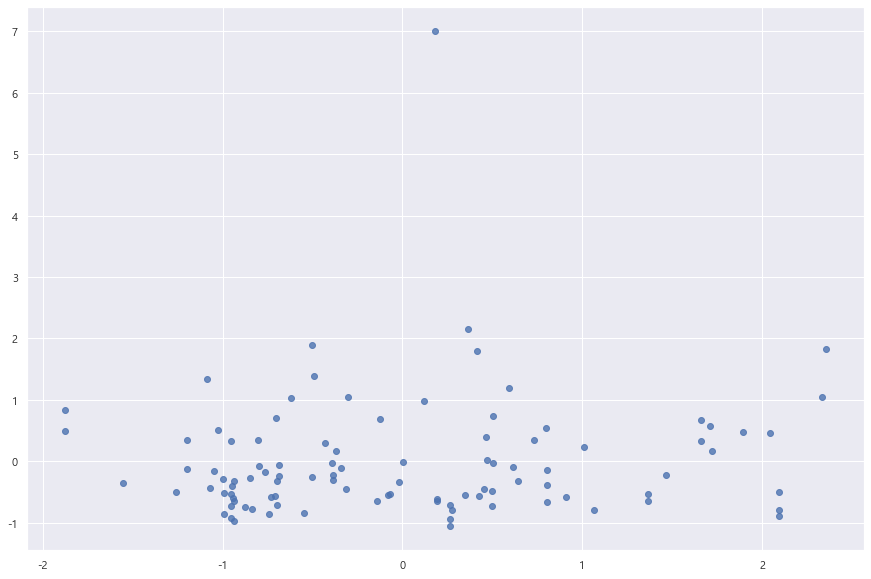

In [ ]:
# 1인 가구수와 일평균 수익 산점도
plt.scatter(df_dr_standard[['1인 가구수']], df_dr_standard[['일평균운행수익(원)']], alpha=0.8)
plt.show()

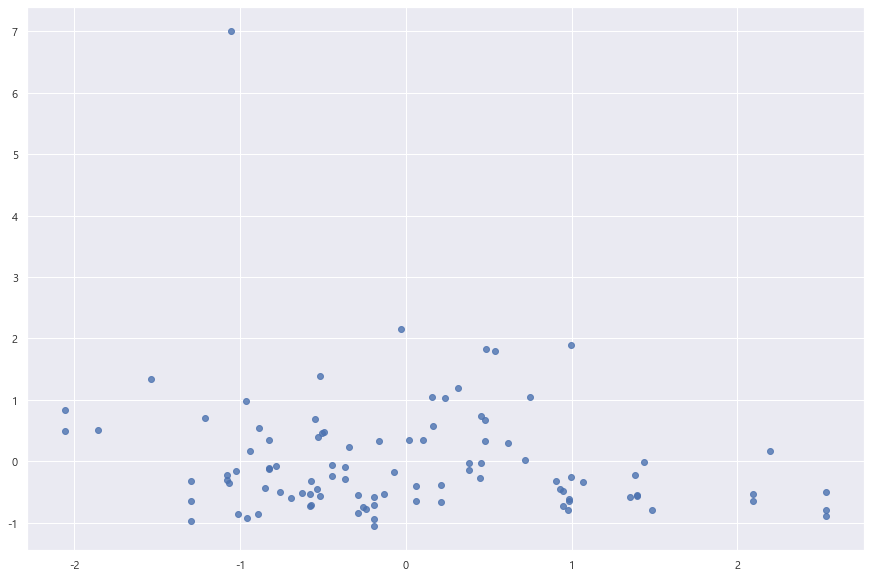

In [ ]:
# 2인 가구수와 일평균 수익 산점도
plt.scatter(df_dr_standard[['2인 가구수']], df_dr_standard[['일평균운행수익(원)']], alpha=0.8)
plt.show()

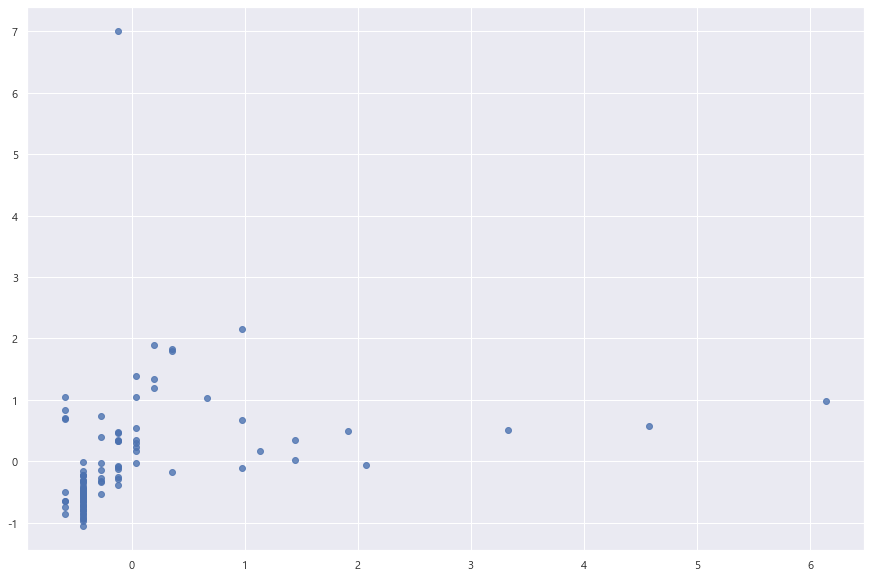

In [ ]:
# 총 상가 수와 일평균 수익 산점도
plt.scatter(df_dr_standard[['총 상가 수']], df_dr_standard[['일평균운행수익(원)']], alpha=0.8)
plt.show()

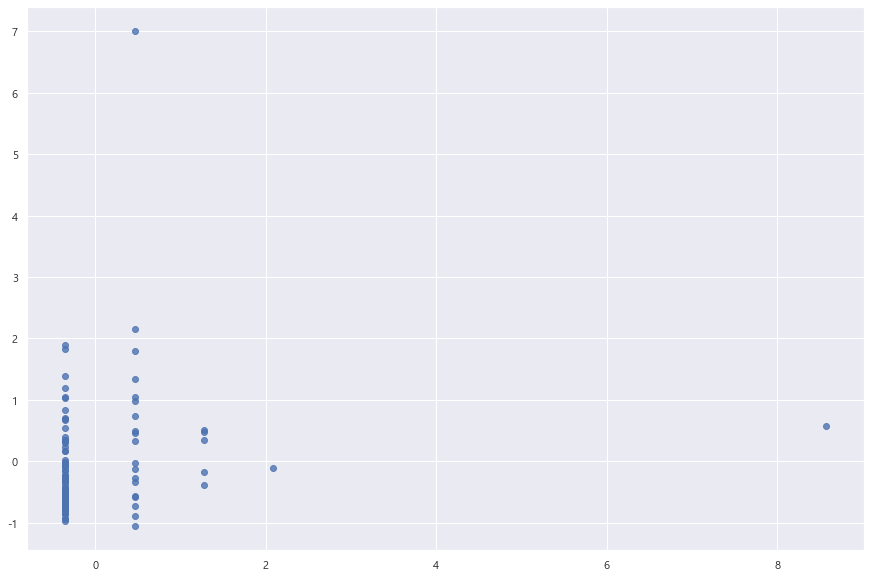

In [ ]:
# 공실 상가 수와 일평균 수익 산점도
plt.scatter(df_dr_standard[['공실 상가 수']], df_dr_standard[['일평균운행수익(원)']], alpha=0.8)
plt.show()

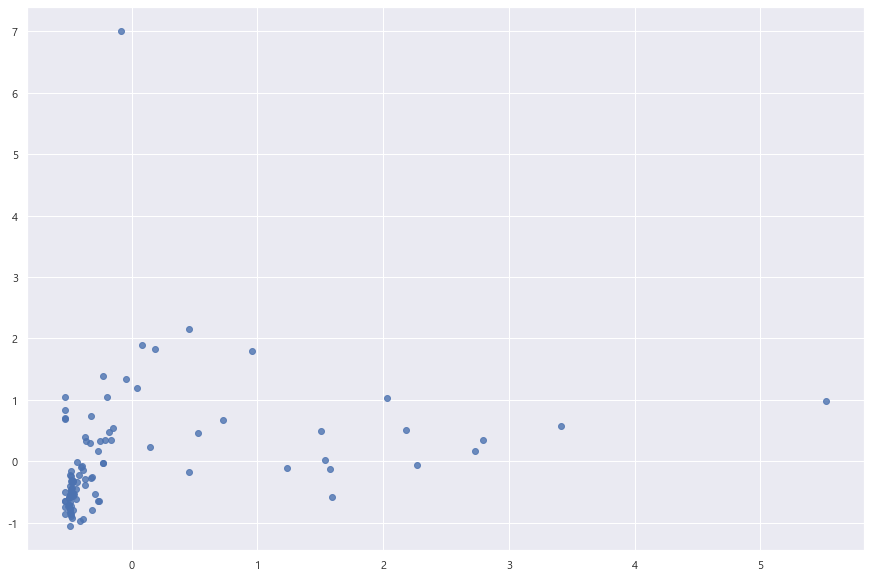

In [ ]:
# 전체 상가 면적와 일평균 수익 산점도
plt.scatter(df_dr_standard[['전체 상가 면적']], df_dr_standard[['일평균운행수익(원)']], alpha=0.8)
plt.show()

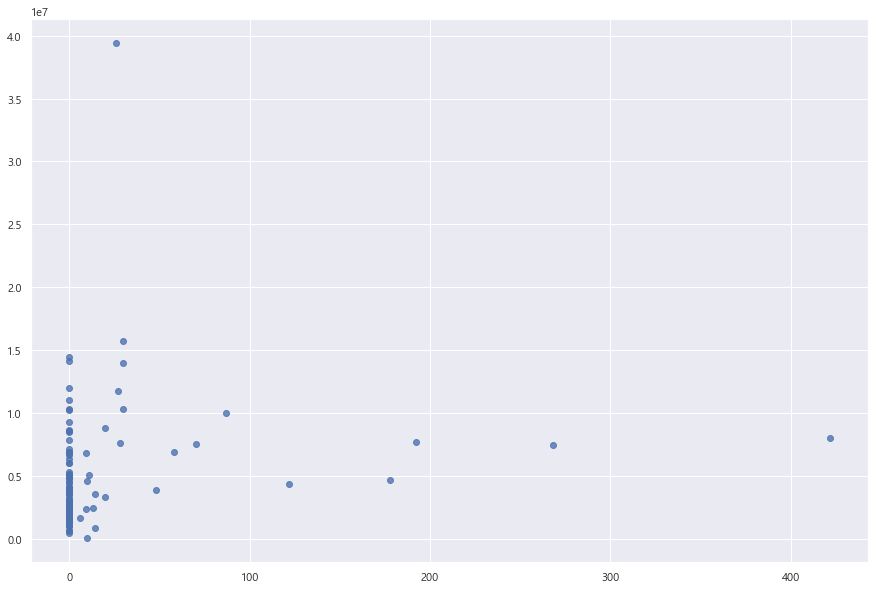

In [ ]:
# 공실 상가 면적와 일평균 수익 산점도
plt.scatter(df_dr[['공실 상가 면적']], df_dr[['일평균운행수익(원)']], alpha=0.8)
plt.show()

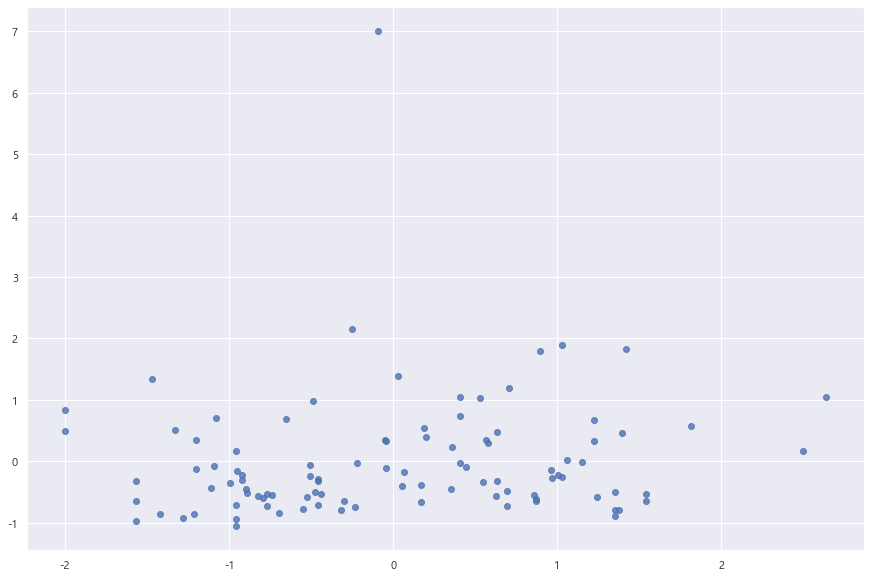

In [ ]:
# 20~40대 인구 수와 일평균 수익 산점도
plt.scatter(df_dr_standard[['20~40대 인구 수']], df_dr_standard[['일평균운행수익(원)']], alpha=0.8)
plt.show()

표준화 전/후 같은 산점도가 나옴

### 상관계수 확인

0.1 이상은 비교해볼만 가치가 있다.\
(유의미한 결과가 있을 수 있다)

In [ ]:
df_standard_corr = df_dr_standard.corr()
df_standard_corr

,사업체수,운수수익,인구수(가중치),일평균승하차,전체 상가 면적
사업체수,1.000000,-0.013475,-0.013754,0.546128,0.153208
운수수익,-0.013475,1.000000,0.003341,-0.172661,-0.189772
인구수(가중치),-0.013754,0.003341,1.000000,0.128095,0.176950
일평균승하차,0.546128,-0.172661,0.128095,1.000000,0.304996
전체 상가 면적,0.153208,-0.189772,0.176950,0.304996,1.000000


In [30]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(df_standard_corr, annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

NameError: name 'df_standard_corr' is not defined

<Figure size 1080x1080 with 0 Axes>

### 다중회귀분석

#### 회귀모델 적합도

In [27]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [28]:
standard_x = df_dr_standard[["일평균승하차","사업체수","인구수(가중치)","전체 상가 면적"]]

In [29]:
standard_y = df_dr_standard[["운수수익"]]

In [30]:
# 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(standard_x, standard_y, test_size=0.3, random_state=42)

In [31]:
# Train the MLR / 회귀모델적합
# OLS(Ordinary Least Squares)
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [32]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                   운수수익   R-squared (uncentered):                   0.087
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              1.573
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                       0.192
Time:                        09:38:49   Log-Likelihood:                         -103.94
No. Observations:                  70   AIC:                                      215.9
Df Residuals:                      66   BIC:                                      224.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.087
- Adj. R-squared : 0.032
- p-value : 모두 X

#### 선형 회귀

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
mlr = LinearRegression()
multi_model = mlr.fit(x_train, y_train) 

In [35]:
# 훈련 정확도
multi_model.score(x_train, y_train)

0.08754934897649491

In [36]:
multi_model.score(x_test, y_test)

-0.5886847055339361

#### 예측

In [37]:
my_predict = mlr.predict(x_test)
my_predict

array([[-0.09488009],
       [ 0.2379082 ],
       [ 0.28919912],
       [ 0.40394899],
       [-0.48905822],
       [-0.22292761],
       [-0.34406211],
       [ 0.08599724],
       [-0.01788384],
       [ 0.45411096],
       [-0.61613944],
       [-0.48007225],
       [ 0.39431016],
       [-0.44958436],
       [ 0.66149944],
       [ 0.43571195],
       [ 0.34792963],
       [ 0.63010678],
       [ 0.35555   ],
       [ 0.17099668],
       [ 0.70611628],
       [ 0.44470941],
       [-0.13778056],
       [-0.04888217],
       [ 0.46235837],
       [-0.8419735 ],
       [-0.32486505],
       [ 0.34251284],
       [ 0.26896385],
       [ 0.40371193],
       [ 0.31676498]])

#### 시각화

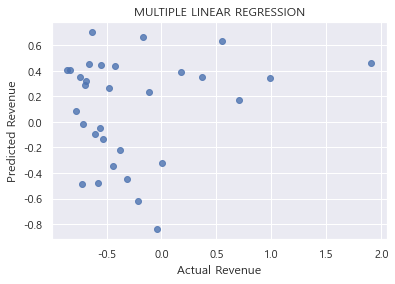

In [38]:
plt.scatter(y_test, my_predict, alpha=0.8)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

#### 상관계수 확인

In [39]:
print(mlr.coef_)

[[-0.31736863  0.17417528  0.09459772 -0.18392296]]


#### 라쏘 회귀 모델

In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0)
lasso.fit(X=x_train, y=y_train)
print(lasso.score(X=x_train, y=y_train))
print(lasso.score(X=x_test, y=y_test))

0.08754934897649469
-0.5886847055339355


C:\Users\admin\AppData\Local\Temp\ipykernel_19660\2117939037.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X=x_train, y=y_train)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.949e+01, tolerance: 8.656e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/R

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [41]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []

for alpha in alpha_list:  #여섯번 계산
    lasso = Lasso(alpha=alpha) #알파값 변경하면서 생성(6번)
    lasso.fit(X=x_train, y=y_train)

    train_score.append(lasso.score(X=x_train, y=y_train))
    test_score.append(lasso.score(X=x_test, y=y_test))

In [42]:
print(train_score)
print(test_score)

[0.08754213089166207, 0.08683409429009825, 0.054791418180960116, 0.0, 0.0, 0.0]
[-0.582934764051342, -0.5361835417139404, -0.3887812705660283, -0.375505589562398, -0.375505589562398, -0.375505589562398]


#### (표준화)Lasso alpha별 score
- alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

<table border="1">
	<th>alpha</th>
	<th>train_score</th>
	<th>test_score</th>
	<tr>
		<td>0.001</td>
	    <td>0.949862670162452</td>
	    <td>0.840838181349398</td>
	</tr>
	<tr>
		<td>0.01</td>
	    <td>0.949778838996651</td>
	    <td>0.8442832245394076</td>
	</tr>
	<tr>
		<td>0.1</td>
	    <td>0.9413847028542649</td>
	    <td>0.8692945794865978</td>
	</tr>
	<tr>
		<td>1</td>
	    <td>0.11832790846166896</td>
	    <td>0.14237363457135477</td>
	</tr>
	<tr>
		<td>10</td>
	    <td>0.0</td>
	    <td>-0.03488240965710543</td>
	</tr>
	<tr>
		<td>100</td>
	    <td>0.0</td>
	    <td>-0.03488240965710543</td>
	</tr>
</table>

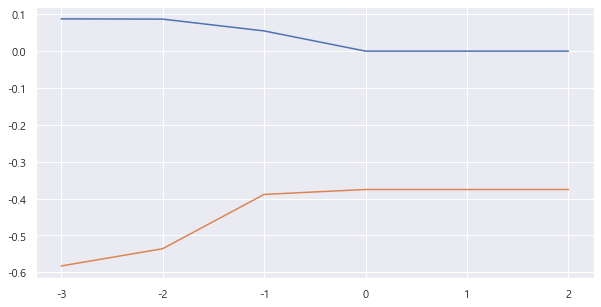

In [43]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [44]:
print(lasso.coef_) #결정계수
print(lasso.intercept_) # 절편

[-0. -0. -0. -0.]
[0.11435489]


#### 릿지 회귀 모델

In [45]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X=x_train, y=y_train)
ridge.score(X=x_train, y=y_train)

0.08748599310348748

In [46]:
ridge.score(X=x_test, y=y_test)

-0.5708993301896308

In [47]:
train_score = []
test_score = []

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [48]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:  #여섯번 계산
    ridge = Ridge(alpha=alpha) #알파값 변경하면서 생성(6번)
    ridge.fit(X=x_train, y=y_train)

    train_score.append(ridge.score(X=x_train, y=y_train))
    test_score.append(ridge.score(X=x_test, y=y_test))

In [49]:
print(train_score)
print(test_score)

[0.0875493489079362, 0.0875493421256025, 0.08754866884147372, 0.08748599310348748, 0.08401018937726912, 0.051568490575570336]
[-0.5886657440015859, -0.5884952024051011, -0.5868008282670705, -0.5708993301896308, -0.47655126517107704, -0.36997469603691036]


In [50]:
print(ridge.coef_) #결정계수
print(ridge.intercept_) # 절편

[[-0.082292    0.01859389  0.00505489 -0.0937132 ]]
[0.11672786]


#### (표준화)Ridge alpha별 score
- alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

<table border="1">
	<th>alpha</th>
	<th>train_score</th>
	<th>test_score</th>
	<tr>
		<td>0.001</td>
	    <td>0.949863504669057</td>
	    <td>0.8404510780343091</td>
	</tr>
	<tr>
		<td>0.01</td>
	    <td>0.9498634956790212</td>
	    <td>0.8404812347823509</td>
	</tr>
	<tr>
		<td>0.1</td>
	    <td>0.949862599493408</td>
	    <td>0.8407805545266169</td>
	</tr>
	<tr>
		<td>1</td>
	    <td>0.9497757009901865</td>
	    <td>0.8435572570800242</td>
	</tr>
	<tr>
		<td>10</td>
	    <td>0.9430930593956346</td>
	    <td>0.8557216014333572</td>
	</tr>
	<tr>
		<td>100</td>
	    <td>0.7591147203774582</td>
	    <td>0.6944879940953291</td>
	</tr>
</table>

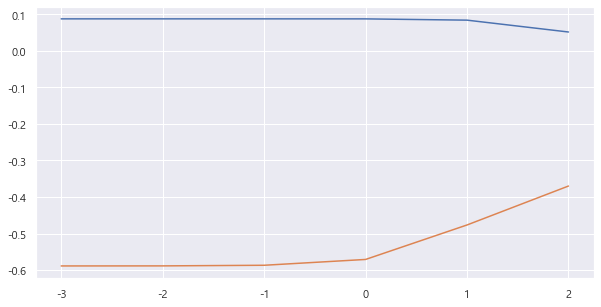

In [51]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

## 정규화(MinMaxScaler) 후 재분석

### MinMaxScaler

In [107]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [108]:
df.max()

일평균승하차         57826.0
사업체수          136818.0
인구수(가중치)    88842501.0
전체 상가 면적        1767.0
운수수익        40739795.0
dtype: float64

In [109]:
df.min()

일평균승하차          0.0
사업체수           64.0
인구수(가중치)    52514.0
전체 상가 면적        0.0
운수수익        89655.0
dtype: float64

In [110]:
df.drop(["역사명"],axis=1,inplace=True)

KeyError: "['역사명'] not found in axis"

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [ ]:
df_scaled = scaler.transform(df)

In [ ]:
minmaxscaled_df = pd.DataFrame(df_scaled, columns=df.columns)
minmaxscaled_df

,일평균승하차,사업체수,인구수(가중치),전체 상가 면적,운수수익
0,0.100284,0.001009,0.310244,0.006225,0.046801
1,0.105610,0.002654,0.127079,0.005659,0.062298
2,0.073514,0.001367,0.026764,0.000000,0.049423
3,0.235551,0.001287,0.326093,0.020939,0.117815
4,0.165081,0.000402,0.046418,0.009055,0.076658
...,...,...,...,...,...
96,0.093349,0.001068,0.101570,0.005659,0.026219
97,0.239442,0.000856,0.091087,0.042445,0.150515
98,0.502888,0.002267,0.357756,0.093945,0.277933
99,0.325010,0.002369,0.308537,0.033390,0.222429


In [ ]:
print(minmaxscaled_df.max())
print(minmaxscaled_df.min())

일평균승하차      1.0
사업체수        1.0
인구수(가중치)    1.0
전체 상가 면적    1.0
운수수익        1.0
dtype: float64
일평균승하차      0.0
사업체수        0.0
인구수(가중치)    0.0
전체 상가 면적    0.0
운수수익        0.0
dtype: float64


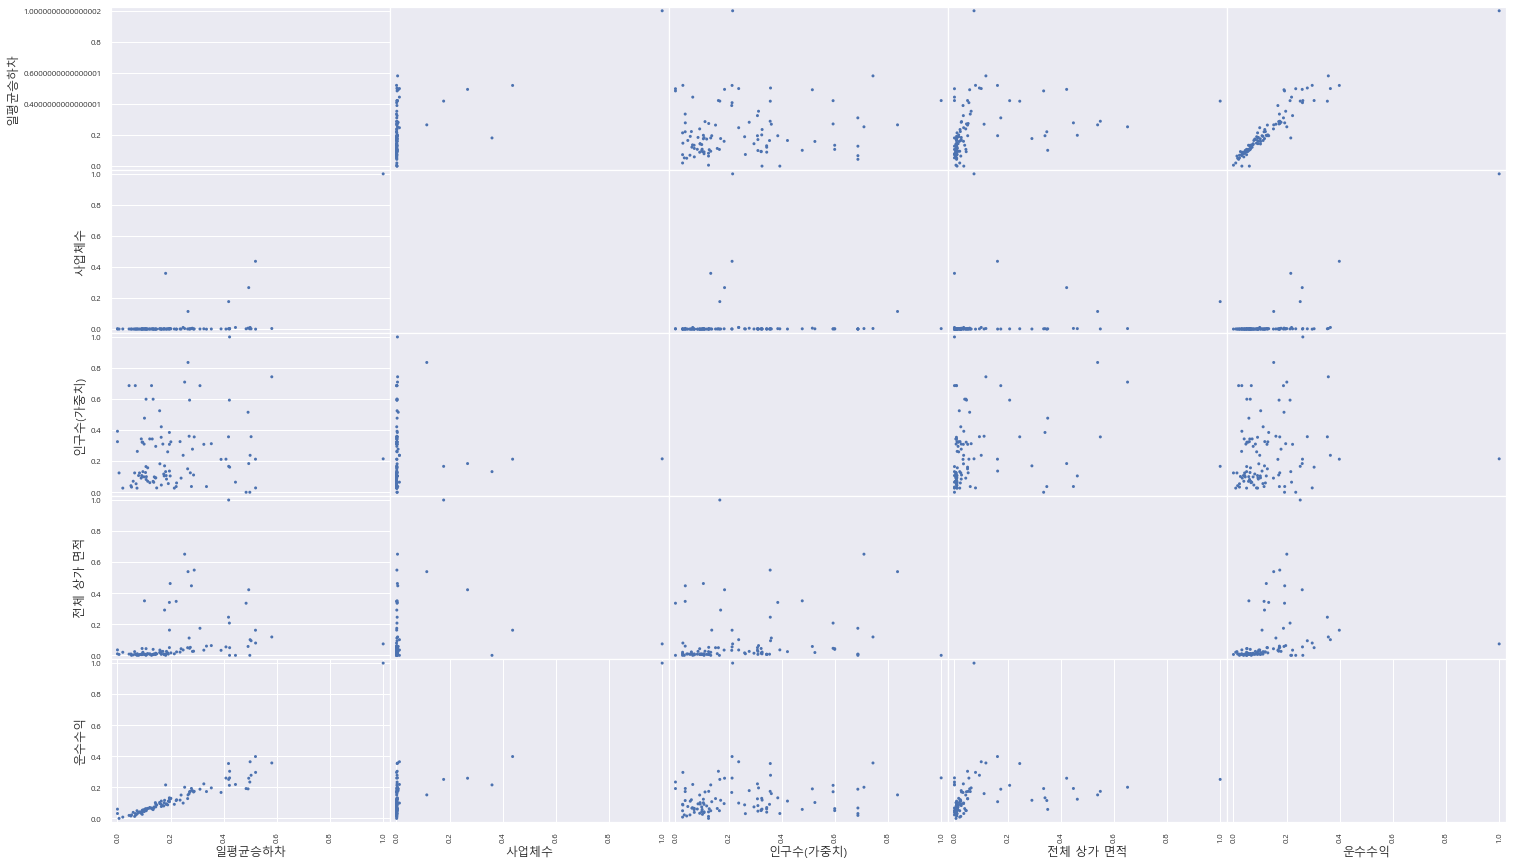

In [111]:
# 변수별 산점도
from pandas.plotting import scatter_matrix
scatter_matrix(minmaxscaled_df,
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(25,15), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

### 상관계수 확인

In [112]:
df_minmaxscale_corr = minmaxscaled_df.corr()
df_minmaxscale_corr

,일평균승하차,사업체수,인구수(가중치),전체 상가 면적,운수수익
일평균승하차,1.000000,0.546128,0.128095,0.304996,0.924528
사업체수,0.546128,1.000000,-0.013754,0.153208,0.744987
인구수(가중치),0.128095,-0.013754,1.000000,0.176950,0.127551
전체 상가 면적,0.304996,0.153208,0.176950,1.000000,0.263327
운수수익,0.924528,0.744987,0.127551,0.263327,1.000000


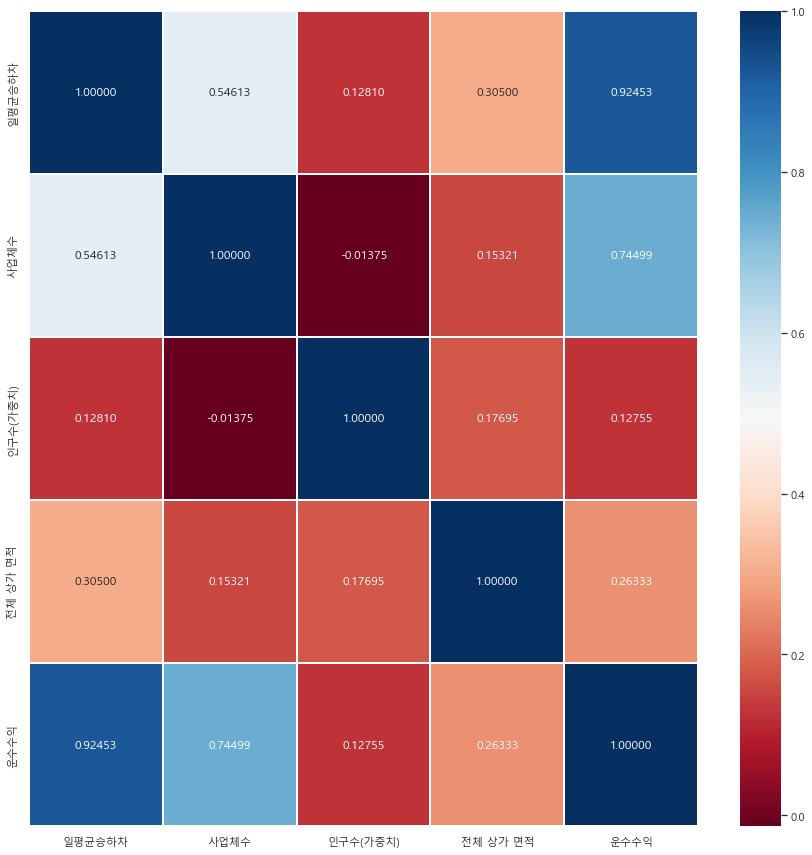

In [113]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(df_minmaxscale_corr, annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

### 다중회귀분석

#### 회귀모델 적합도

In [114]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [115]:
minmaxscale_x = minmaxscaled_df[["일평균승하차","사업체수","인구수(가중치)","전체 상가 면적"]]

In [116]:
minmaxscale_y = minmaxscaled_df[["운수수익"]]

In [117]:
# 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(minmaxscale_x, minmaxscale_y, test_size=0.3, random_state=42)

In [118]:
# Train the MLR / 회귀모델적합
# OLS(Ordinary Least Squares)
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [119]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                   운수수익   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              556.1
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                    4.87e-50
Time:                        13:19:46   Log-Likelihood:                          138.11
No. Observations:                  70   AIC:                                     -268.2
Df Residuals:                      66   BIC:                                     -259.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.971
- Adj. R-squared : 0.969
- p-value
    - 일평균승하차, 사업체수 : 0
    - 인구수(가중치) : 0.287
    - 전체 상가 면적 : 0.960

In [120]:
minmaxscale_x = minmaxscaled_df[["일평균승하차","사업체수","인구수(가중치)"]]

In [121]:
# 다시 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(minmaxscale_x, minmaxscale_y, test_size=0.3, random_state=42)

In [122]:
# 다시 회귀분석 실행
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [123]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                   운수수익   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              752.7
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                    1.63e-51
Time:                        13:19:47   Log-Likelihood:                          138.11
No. Observations:                  70   AIC:                                     -270.2
Df Residuals:                      67   BIC:                                     -263.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.971
- Adj. R-squared : 0.970
- p-value
    - 일평균승하차, 사업체수 : 0
    - 인구수(가중치) : 0.268

#### 선형 회귀

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
mlr = LinearRegression()
multi_model = mlr.fit(x_train, y_train) 

In [126]:
# 훈련 정확도
multi_model.score(x_train, y_train)

0.9405636195677461

In [127]:
multi_model.score(x_test, y_test)

0.9020192892236653

#### 예측

In [128]:
my_predict = mlr.predict(x_test)
my_predict

array([[0.05402726],
       [0.11586522],
       [0.04650871],
       [0.03342988],
       [0.0280336 ],
       [0.095148  ],
       [0.08019137],
       [0.04485504],
       [0.05140693],
       [0.0563899 ],
       [0.09412125],
       [0.05593624],
       [0.12760674],
       [0.09707101],
       [0.10460959],
       [0.08550119],
       [0.03997194],
       [0.19554866],
       [0.04991516],
       [0.23658512],
       [0.05279172],
       [0.05489251],
       [0.08230724],
       [0.00188985],
       [0.27786393],
       [0.10639312],
       [0.11257549],
       [0.29675031],
       [0.06885663],
       [0.04764696],
       [0.14785547]])

#### 시각화

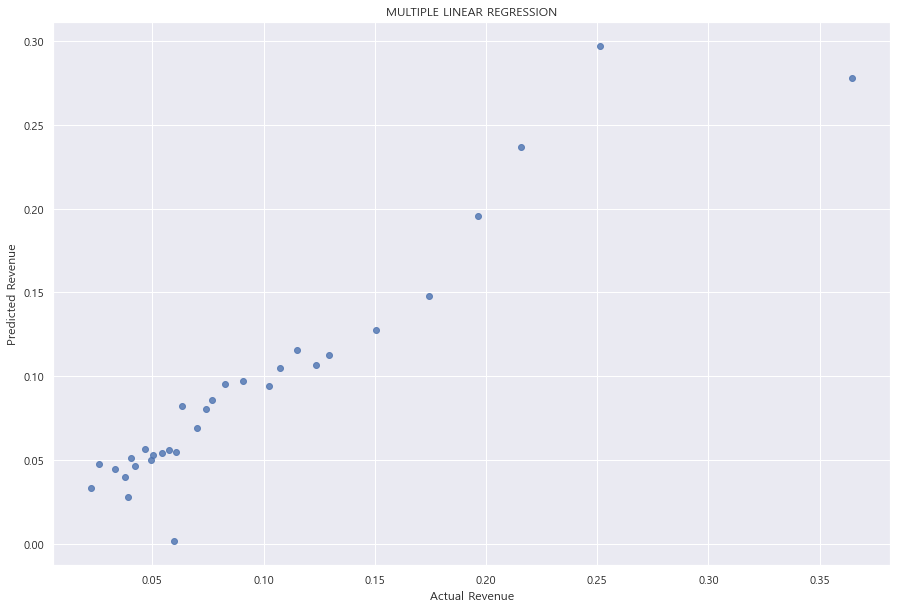

In [129]:
plt.scatter(y_test, my_predict, alpha=0.8)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

#### 상관계수 확인

In [130]:
print(mlr.coef_)

[[0.54958939 0.39023176 0.02374321]]


#### 라쏘 회귀 모델

In [131]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0)
lasso.fit(X=x_train, y=y_train)
print(lasso.score(X=x_train, y=y_train))
print(lasso.score(X=x_test, y=y_test))

0.9405636195677461
0.9020192892236654


C:\Users\admin\AppData\Local\Temp\ipykernel_15864\2117939037.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X=x_train, y=y_train)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.927e-02, tolerance: 1.322e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/R

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [132]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []

for alpha in alpha_list:  #여섯번 계산
    lasso = Lasso(alpha=alpha) #알파값 변경하면서 생성(6번)
    lasso.fit(X=x_train, y=y_train)

    train_score.append(lasso.score(X=x_train, y=y_train))
    test_score.append(lasso.score(X=x_test, y=y_test))

In [133]:
print(train_score)
print(test_score)

[0.9364992530227219, 0.6744837678147205, 0.0, 0.0, 0.0, 0.0]
[0.9064693217066869, 0.6904612044608045, -0.37271986699553583, -0.37271986699553583, -0.37271986699553583, -0.37271986699553583]


In [134]:
print(lasso.coef_) #결정계수
print(lasso.intercept_) # 절편

[0. 0. 0.]
[0.14282912]


#### (정규화)Lasso alpha별 score
- alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

<table border="1">
	<th>alpha</th>
	<th>train_score</th>
	<th>test_score</th>
	<tr>
		<td>0.001</td>
	    <td>0.9364992530227219</td>
	    <td>0.9064693217066869</td>
	</tr>
	<tr>
		<td>0.01</td>
	    <td>0.6744837678147205</td>
	    <td>0.6904612044608045</td>
	</tr>
	<tr>
		<td>0.1</td>
	    <td>0.0</td>
	    <td>-0.37271986699553583</td>
	</tr>
	<tr>
		<td>1</td>
	    <td>0.0</td>
	    <td>-0.37271986699553583</td>
	</tr>
	<tr>
		<td>10</td>
	    <td>0.0</td>
	    <td>-0.37271986699553583</td>
	</tr>
	<tr>
		<td>100</td>
	    <td>0.0</td>
	    <td>-0.37271986699553583</td>
	</tr>
</table>

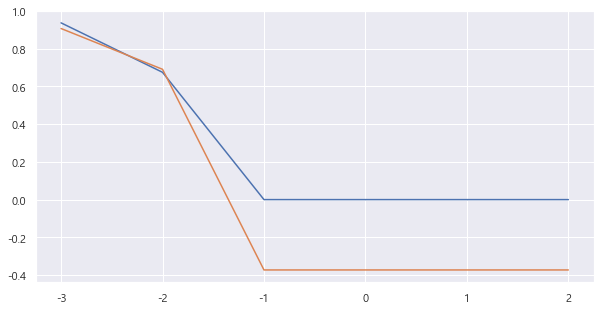

In [135]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

#### 릿지 회귀 모델

In [136]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X=x_train, y=y_train)
ridge.score(X=x_train, y=y_train)

0.872932597437587

In [137]:
ridge.score(X=x_test, y=y_test)

0.8151927409172263

In [138]:
train_score = []
test_score = []

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [139]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:  #여섯번 계산
    ridge = Ridge(alpha=alpha) #알파값 변경하면서 생성(6번)
    ridge.fit(X=x_train, y=y_train)

    train_score.append(ridge.score(X=x_train, y=y_train))
    test_score.append(ridge.score(X=x_test, y=y_test))

In [140]:
print(train_score)
print(test_score)

[0.9405634918159129, 0.9405509316796355, 0.9393770711884147, 0.872932597437587, 0.3627074048932648, 0.05004741900838161]
[0.902024856006311, 0.9020595446600363, 0.900987901675707, 0.8151927409172263, 0.12616378396667005, -0.30354833873356646]


In [141]:
print(ridge.coef_) #결정계수
print(ridge.intercept_) # 절편

[[0.01496194 0.00976102 0.00263781]]
[0.13827095]


#### (정규화)Ridge alpha별 score
- alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

<table border="1">
	<th>alpha</th>
	<th>train_score</th>
	<th>test_score</th>
	<tr>
		<td>0.001</td>
	    <td>0.9405634918159129</td>
	    <td>0.902024856006311</td>
	</tr>
	<tr>
		<td>0.01</td>
	    <td>0.9405509316796355</td>
	    <td>0.9020595446600363</td>
	</tr>
	<tr>
		<td>0.1</td>
	    <td>0.9393770711884147</td>
	    <td>0.900987901675707</td>
	</tr>
	<tr>
		<td>1</td>
	    <td>0.872932597437587</td>
	    <td>0.8151927409172263</td>
	</tr>
	<tr>
		<td>10</td>
	    <td>0.3627074048932648</td>
	    <td>0.12616378396667005</td>
	</tr>
	<tr>
		<td>100</td>
	    <td>0.05004741900838161</td>
	    <td>-0.30354833873356646</td>
	</tr>
</table>

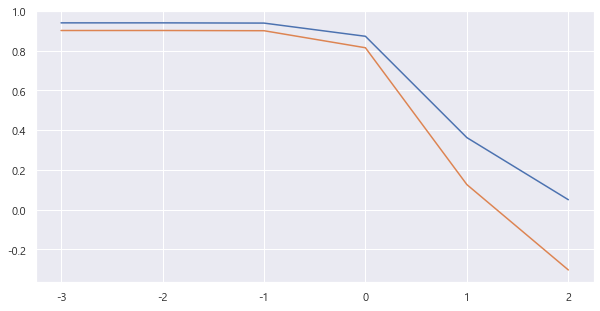

In [142]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

train_score와 test_score값이 떨어지기 전 + 일치할 때인, alpha가 1일떄 가장 최적화됐다.

### Min-max scaler로 정규화한 데이터를 가지고 Ridge모델을 사용하는 것이 가장 좋은 결과가 나옴

# 번외

### 데이터
- 역별 데이터
- 2016년 ~ 2022년 10월
- 일평균승하차 : 역별 일평균승하차
- 업장수 : 10인 이하 업체
- 일평균(원) : 역별 일평균 운수 수익

In [ ]:
df = pd.read_csv("./2016~2022_일평균 승하차,운수수익.csv", encoding="euc-kr")
df

,역사명,연도,일평균 승하차,일평균 운수수익
0,가야,2016,7289.0,2579454
1,감전,2016,7626.0,3395089
2,강서구청,2016,5600.0,2717454
3,개금,2016,16331.0,6317217
4,거제,2016,9650.0,4150958
...,...,...,...,...
688,충렬사,2022,5719.0,1056843
689,토성,2022,15118.0,5678334
690,하단,2022,32746.0,10415912
691,해운대,2022,23072.0,8352193


### 결측치 채워넣기

In [ ]:
df.isnull().sum()

역사명         0
연도          0
일평균 승하차     6
일평균 운수수익    0
dtype: int64

In [ ]:
df = df.fillna(0)
df.isnull().sum()

역사명         0
연도          0
일평균 승하차     0
일평균 운수수익    0
dtype: int64

In [ ]:
df.iloc[124]["일평균 승하차"]

11170.0

In [ ]:
# 다대포해수욕장은 증가/감소 추세가 섞여 있어서 2017년 값을 대입
df.iat[25,2] = 11170.0
df.iat[25,2]

11170.0

낫개, 다대포항, 동매, 신장림, 장림역은 증가 추세가 보이므로 가격 차이만큼 역산하여 넣기

In [ ]:
# 낫개역
df.iat[21,2] = 9122
df.iat[21,2]

9122.0

In [ ]:
# 다대포항
df.iat[24,2] = 6886
df.iat[24,2]

6886.0

In [ ]:
# 동매
df.iat[34,2] = 5434
df.iat[34,2]

5434.0

In [ ]:
# 신장림
df.iat[74,2] = 5725
df.iat[74,2]

5725.0

In [ ]:
# 장림
df.iat[82,2] = 4590
df.iat[82,2]

4590.0

In [ ]:
df.isnull().sum()

역사명         0
연도          0
일평균 승하차     0
일평균 운수수익    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   역사명       693 non-null    object 
 1   연도        693 non-null    int64  
 2   일평균 승하차   693 non-null    float64
 3   일평균 운수수익  693 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 21.8+ KB


In [ ]:
df['일평균 승하차'] = df[['일평균 승하차']].astype(int)

### 산점도

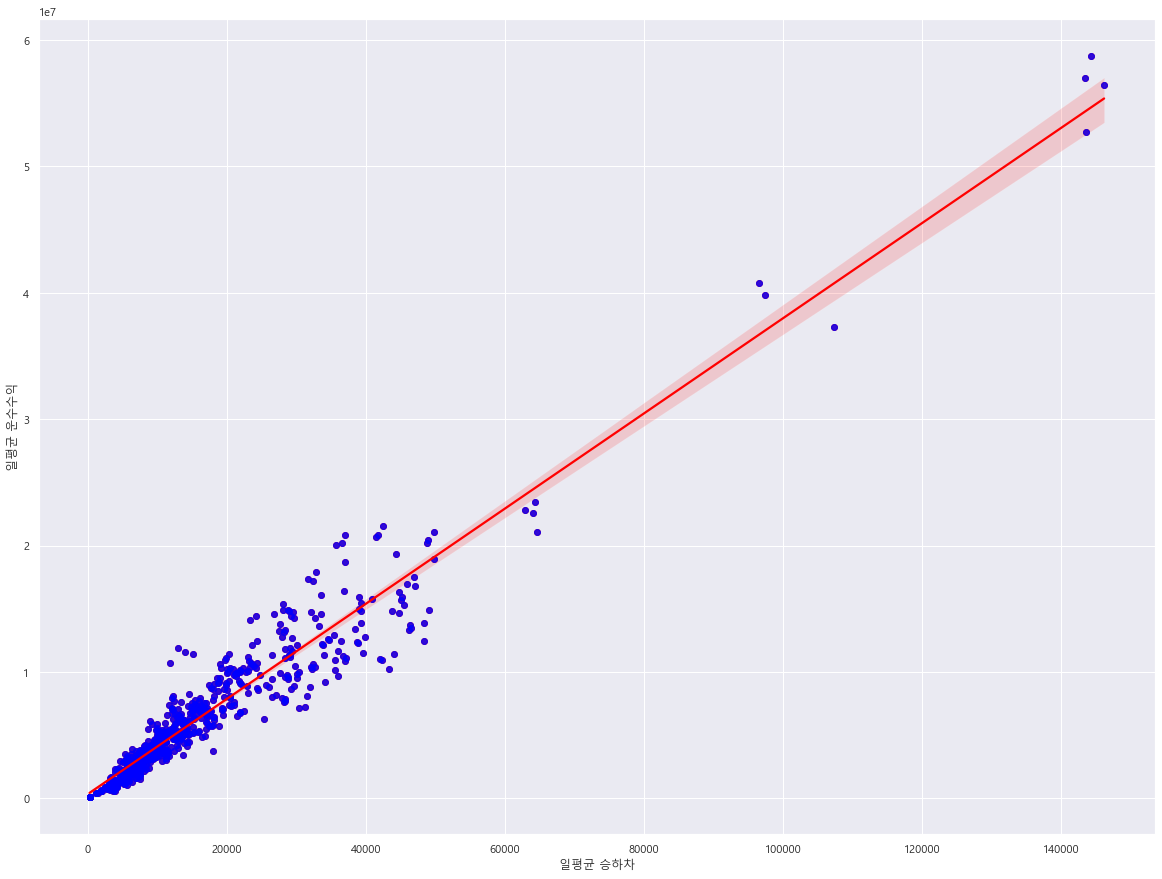

In [ ]:
plt.figure(figsize=(20,15))
sns.regplot(x='일평균 승하차', y='일평균 운수수익', data=df, color="red")
plt.scatter(df[['일평균 승하차']], df[['일평균 운수수익']], alpha=0.8, color='blue')
plt.show()